In [74]:
# Libraries for all projects
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Predicting Ice Cream Sales: Supervised Learning Example

In [75]:
# Generate data
np.random.seed(42)
temperature = np.random.normal(30, 10, 100)
ice_cream_sales = 5 * temperature + np.random.normal(0, 20, 100)
print(temperature)
print(ice_cream_sales)

[34.96714153 28.61735699 36.47688538 45.23029856 27.65846625 27.65863043
 45.79212816 37.67434729 25.30525614 35.42560044 25.36582307 25.34270246
 32.41962272 10.86719755 12.75082167 24.37712471 19.8716888  33.14247333
 20.91975924 15.87696299 44.65648769 27.742237   30.67528205 15.75251814
 24.55617275 31.1092259  18.49006423 33.75698018 23.9936131  27.0830625
 23.98293388 48.52278185 29.86502775 19.42289071 38.22544912 17.7915635
 32.08863595 10.40329876 16.71813951 31.96861236 37.3846658  31.71368281
 28.84351718 26.98896304 15.2147801  22.80155792 25.39361229 40.57122226
 33.4361829  12.36959845 33.24083969 26.1491772  23.23078    36.11676289
 40.30999522 39.31280119 21.60782477 26.90787624 33.31263431 39.75545127
 25.20825762 28.14341023 18.93665026 18.03793376 38.12525822 43.56240029
 29.27989878 40.03532898 33.61636025 23.54880245 33.61395606 45.38036566
 29.64173961 45.64643656  3.80254896 38.21902504 30.87047068 27.0099265
 30.91760777 10.12431085 27.80328112 33.57112572 44.77

In [76]:
# Split the data
from sklearn.model_selection import train_test_split    # useful for evaluating the performance of your model
X = temperature.reshape(-1, 1)                          # reshape for the features matrix
y = ice_cream_sales                                     # set target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, 
                                                random_state=42)

In [77]:
# Train the model
from sklearn.linear_model import LinearRegression   # 1. choose model class
model = LinearRegression()                          # 2. instantiate model
model.fit(Xtrain, ytrain)                           # 3. fit model to data
y_model = model.predict(Xtest)                      # 4. predict on new data

In [78]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, y_model)
r2 = r2_score(ytest, y_model)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 349.14
R-squared: 0.80


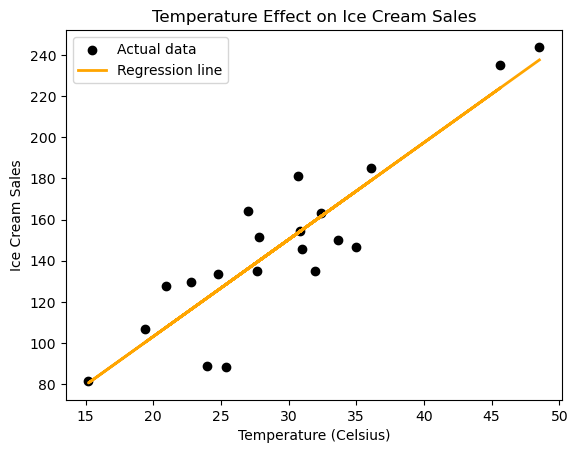

In [79]:
# Plot the Model
plt.scatter(Xtest, ytest, color='black', label='Actual data')
plt.plot(Xtest, y_model, color='orange', linewidth=2, label='Regression line')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Ice Cream Sales')
plt.title('Temperature Effect on Ice Cream Sales')
plt.legend();

## Pokemon Classification

* *Purpose*: Make a model to predict whether a Pokemon is legnedary or not based on its attributes such as Attack, HP, Defense, etc.

In [80]:
# Import data
poke_df = pd.read_csv("CSV//pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [81]:
# Define data
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation']
X = poke_df[features]  # features matrix
y = poke_df['Legendary']                                                      # target vector

In [82]:
# Split data into training and tests sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, 
                                                random_state=42)


In [83]:
# Train the model
from sklearn.ensemble import RandomForestClassifier     # 1. choose model class
model = RandomForestClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

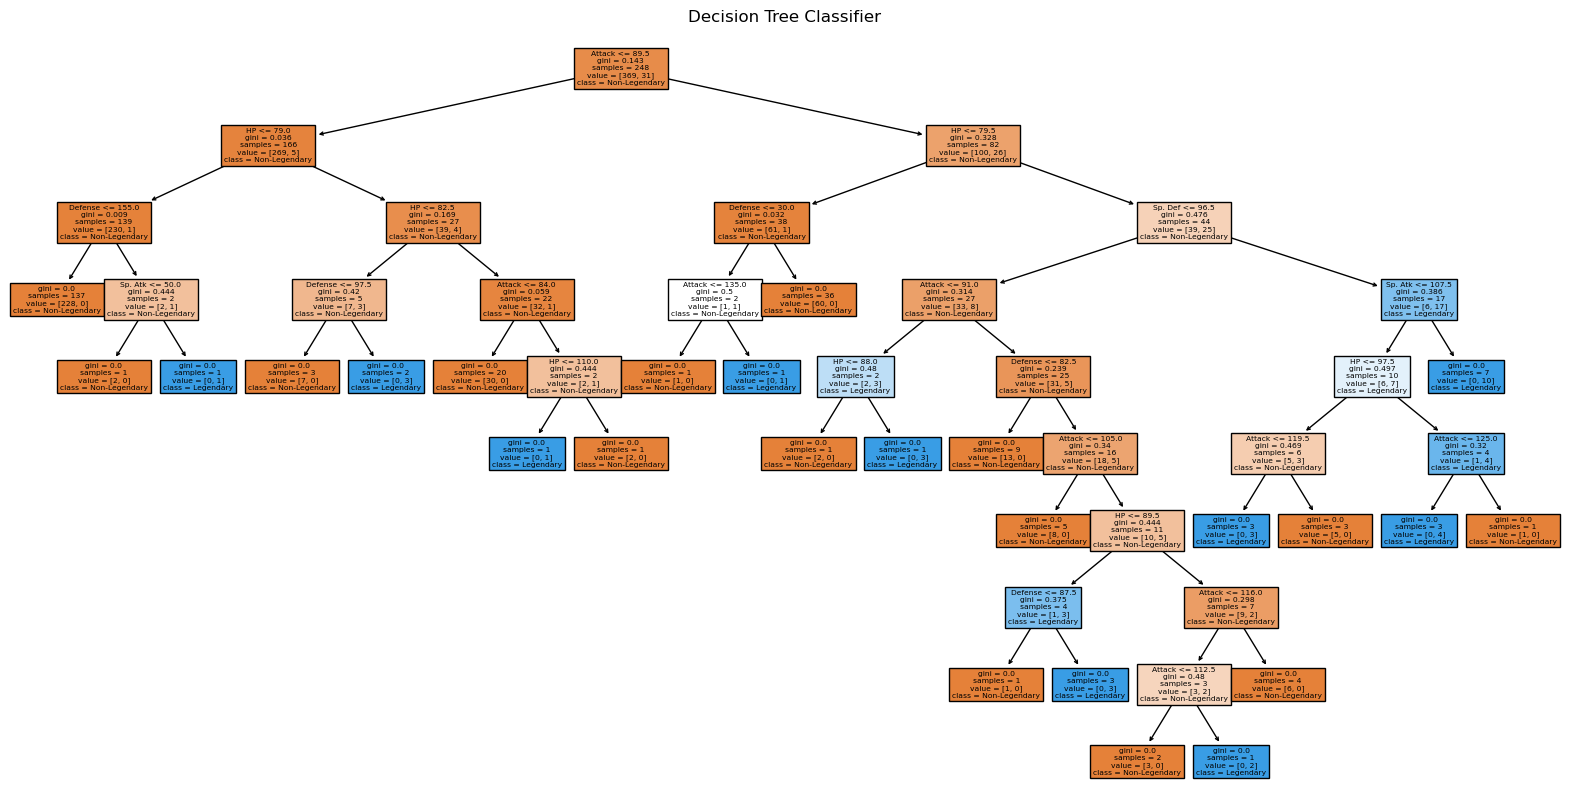

In [84]:
# Visualizing the decision tree by Extract a single tree from RandomForestClassifier
tree_index = 0  # Index of the tree to visualize
single_tree = model.estimators_[tree_index]

# Plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=features, class_names=['Non-Legendary', 'Legendary'], filled=True)
plt.title('Decision Tree Classifier');

In [85]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(ytest, ypred))

Accuracy: 0.94
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       372
        True       0.63      0.43      0.51        28

    accuracy                           0.94       400
   macro avg       0.79      0.70      0.74       400
weighted avg       0.94      0.94      0.94       400



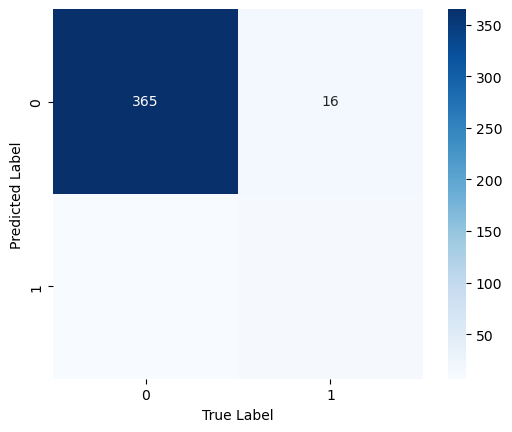

In [86]:
# Visualizing Confusion matrix using Seaborn heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Blues', cbar=True);
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

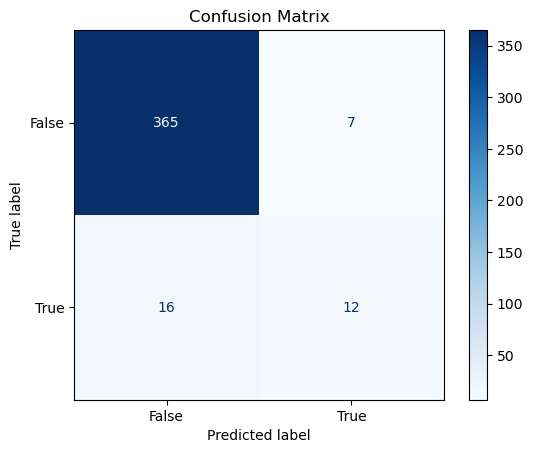

In [87]:
# Visualizing using Confusion Matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix');


## Fruit Classification

In [88]:
# Creating the dataset

data = {
     'Weight': [150, 160, 170, 130, 140, 135, 155, 120, 110, 145, 200, 210, 220, 215, 205],
    'Color': ['Red', 'Red', 'Red', 'Red', 'Red', 'Orange', 'Orange', 'Orange', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow'],
    'Size': ['Medium', 'Medium', 'Medium', 'Small', 'Small', 'Medium', 'Medium', 'Small', 'Small', 'Small', 'Large', 'Large', 'Large', 'Large', 'Large'],
    'Fruit': ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana', 'Banana']
}

fruit_df = pd.DataFrame(data)
fruit_df

,Weight,Color,Size,Fruit
0,150,Red,Medium,Apple
1,160,Red,Medium,Apple
2,170,Red,Medium,Apple
3,130,Red,Small,Apple
4,140,Red,Small,Apple
5,135,Orange,Medium,Orange
6,155,Orange,Medium,Orange
7,120,Orange,Small,Orange
8,110,Yellow,Small,Banana
9,145,Yellow,Small,Banana


In [89]:
# Encode the features
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
le_color = LabelEncoder()
le_size = LabelEncoder()
le_fruit = LabelEncoder()
fruit_df['Color'] = le_color.fit_transform(fruit_df['Color']) # transform labels to numerical labels
print(le_color.classes_) 
fruit_df['Size'] = le_size.fit_transform(fruit_df['Size'])
print(le_size.classes_)
fruit_df['Fruit'] = le_fruit.fit_transform(fruit_df['Fruit'])
print(le_fruit.classes_)


['Orange' 'Red' 'Yellow']
['Large' 'Medium' 'Small']
['Apple' 'Banana' 'Orange']


In [90]:
# display new dataframe
fruit_df

,Weight,Color,Size,Fruit
0,150,1,1,0
1,160,1,1,0
2,170,1,1,0
3,130,1,2,0
4,140,1,2,0
5,135,0,1,2
6,155,0,1,2
7,120,0,2,2
8,110,2,2,1
9,145,2,2,1


In [91]:
#print(le.inverse_transform(fruit_df['Color'])) # prints the wrong info because `LabelEncoder` remembers the last instance; need seperate encoders
#print(le.inverse_transform(fruit_df['Size']))
#print(le.inverse_transform(fruit_df['Fruit']))

In [92]:
# Checking encoding is correct
print(le_color.inverse_transform(fruit_df['Color']))
print(le_size.inverse_transform(fruit_df['Size']))
print(le_fruit.inverse_transform(fruit_df['Fruit']))

['Red' 'Red' 'Red' 'Red' 'Red' 'Orange' 'Orange' 'Orange' 'Yellow'
 'Yellow' 'Yellow' 'Yellow' 'Yellow' 'Yellow' 'Yellow']
['Medium' 'Medium' 'Medium' 'Small' 'Small' 'Medium' 'Medium' 'Small'
 'Small' 'Small' 'Large' 'Large' 'Large' 'Large' 'Large']
['Apple' 'Apple' 'Apple' 'Apple' 'Apple' 'Orange' 'Orange' 'Orange'
 'Banana' 'Banana' 'Banana' 'Banana' 'Banana' 'Banana' 'Banana']


In [93]:
# Define features matrix and target vector
X = fruit_df[['Weight', 'Color', 'Size']]       # features matrix
y = fruit_df['Fruit']                           # target vector

In [94]:
# Split data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=42)

In [95]:
# Train model
from sklearn.tree import DecisionTreeClassifier         # 1. choose model class
model = DecisionTreeClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

In [96]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 66.67%


/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/johnwesley/miniconda

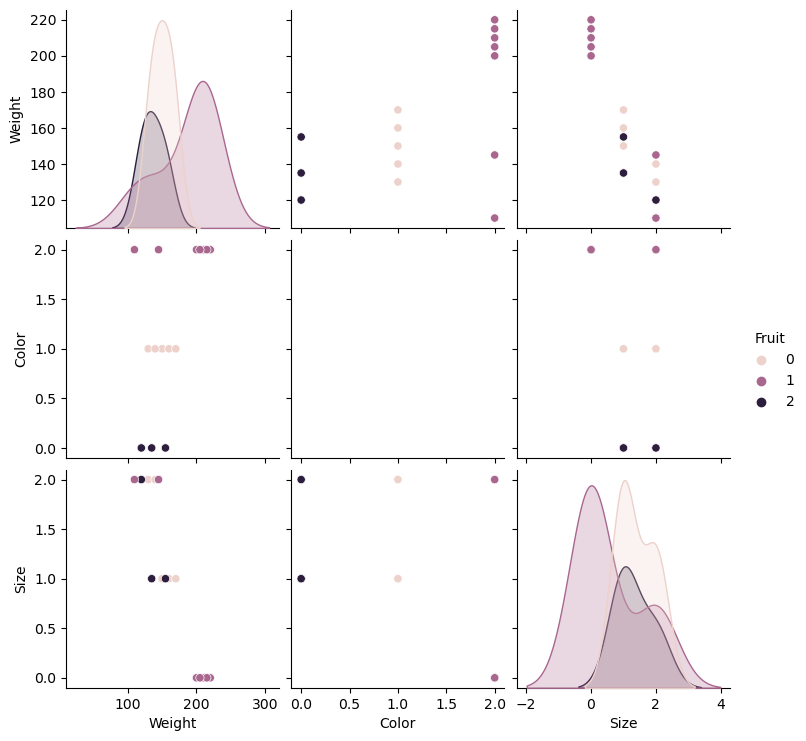

In [97]:
# Visualizing
sns.pairplot(fruit_df, hue='Fruit', vars=['Weight', 'Color', 'Size']);

### Spam Email Classification

In [98]:
# Sample data
data = {
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham'],
    'message': [
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)',
        'U dun say so early hor... U c already then say...',
        'Nah I don’t think he goes to usf, he lives around here though',
        'FreeMsg Hey there darling it’s been 3 week’s now and no word back! I’d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv',
        'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
        'I HAVE A DATE ON SUNDAY WITH WILL!!',
        'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>>',
        'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010. T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
        'I‘ve been searching for the right words to thank you for this breather. I promise i won’t take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.'
    ]
}

df = pd.DataFrame(data)

In [99]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['message'] = df['message'].str.replace(r'\W', ' ').str.lower()

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [100]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [102]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [103]:
new_message = ["Hey JW! Thanks for reaching out to us"]
new_message_transformed = vectorizer.transform(new_message)
prediction = model.predict(new_message_transformed)
print('Prediction (0 = ham, 1 = spam):', prediction[0])

Prediction (0 = ham, 1 = spam): 0


## Predicting Animal Species from Images

In [104]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize


In [105]:
# Getting species names from folder names
dataset_path = 'CSV//animals-10//few'
classes = os.listdir(dataset_path)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
print(f'Classes: {classes}')

Classes: ['cat', 'butterfly', 'spider', 'elephant']


In [108]:
# Read Images and Labels (species) into lists

images = []
labels = []

valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)  # constructs full path to the image file
        
        # Check if the file has a valid image extension
        if any(img_path.lower().endswith(ext) for ext in valid_image_extensions):
            img = imread(img_path)  # reads the image file into a NumPy array using skimage
            
            # Ensure the image has 3 channels (RGB)
            if len(img.shape) == 2:  # grayscale image
                img = np.stack((img,)*3, axis=-1)
            elif img.shape[2] == 4:  # RGBA image
                img = img[:, :, :3]
                
            img_resized = resize(img, (64, 64))  # resizes the image to a fixed size for consistent input for ML model
            images.append(img_resized)  # appends resized image to images list
            labels.append(class_name)  # appends the class name (species) to the labels list

In [109]:
# convert lists to NumPy Arrays
X = np.array(images)                # features matrix
y = np.array(labels)                # target vector

In [110]:
print(f'Total images: {X.shape[0]}, Image shape: {X.shape[1:]}') # images should be 64x64; 3 represents color channels(red, green, blue)

Total images: 4565, Image shape: (64, 64, 3)


### Preprocessing Images

* need dataset to be [n_samples, n_features]
* image is 3D: (height x width x channels)
* need to flatten image to convert it to a 1D array
* need to encode labels

In [111]:
# convert dataset to be [n_samples, n_features]
Xflat = X.reshape(X.shape[0], -1)
Xflat.shape

(4565, 12288)

In [112]:
# encode species labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
yencoded = le.fit_transform(y)
print(yencoded)
print(le.inverse_transform(yencoded))

[1 1 1 ... 2 2 2]
['cat' 'cat' 'cat' ... 'elephant' 'elephant' 'elephant']


In [113]:
# Split the data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xflat, yencoded, test_size=0.3, random_state=42)

### Validation Curve
Validation curve to determine relationship between accuracy and number of estimators for RandomForestClassifier

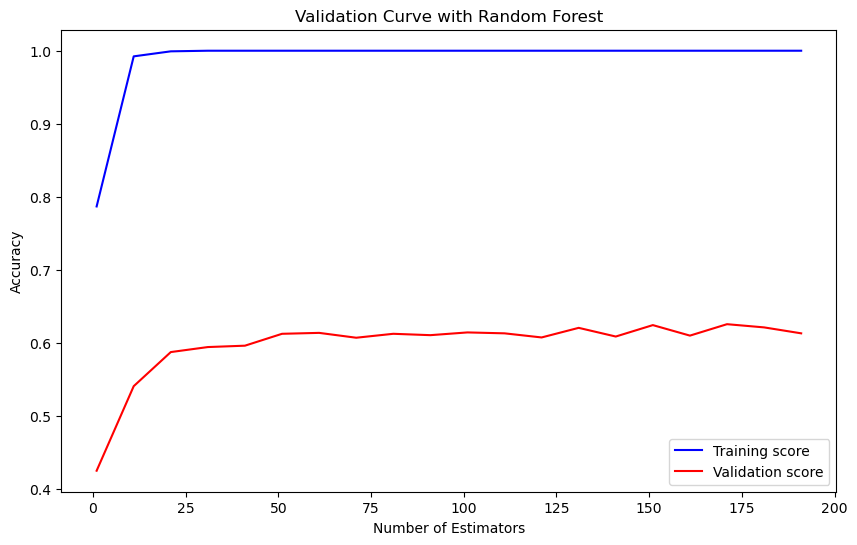

In [114]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
param_range = np.arange(1, 201, 10)
train_score, val_score = validation_curve(
    RandomForestClassifier(),
    Xtrain, ytrain,
    param_name='n_estimators',
    param_range=np.arange(1, 201, 10),
    cv=4,
    scoring='accuracy',
    n_jobs=1
)

#train_mean = np.mean(train_score, axis=1)
#train_std = np.std(train_score, axis=1)
#val_mean = np.mean(val_score, axis=1)
#val_std = np.std(val_score, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, np.median(train_score, 1), label="Training score", color='b')
plt.plot(param_range, np.median(val_score, 1), label="Validation score", color='r')

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend(loc="best");

### Train model

In [115]:
from sklearn.tree import DecisionTreeClassifier         # 1. choose model class
model = DecisionTreeClassifier()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

from sklearn.ensemble import RandomForestClassifier     # 1. choose model class
model_rf = RandomForestClassifier(n_estimators=120)     # 2. instantiate model
model_rf.fit(Xtrain, ytrain)                            # 3. fit model to data
ypred_rf = model_rf.predict(Xtest)                      # 4. predict on new data

In [116]:
### Evaluate the model accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))
print(accuracy_score(ytest, ypred_rf))


0.45328467153284674
0.6058394160583942


Decision Tree Predictions:


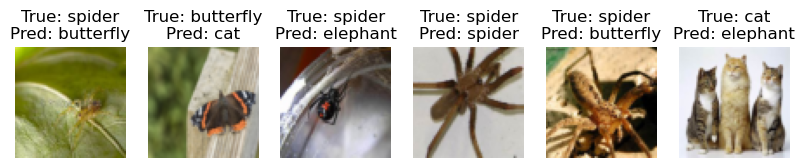

Random Forest Predictions:


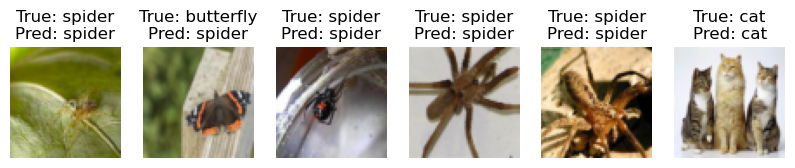

In [117]:
### Visualizing some predictions
def plot_predictions(images, true_labels, pred_labels, label_encoder, num_images=6):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_label = label_encoder.inverse_transform([true_labels[i]])[0]
        pred_label = label_encoder.inverse_transform([pred_labels[i]])[0]
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.show()

# Select a few images to visualize
indices = np.random.choice(len(Xtest), 6, replace=False)
images_to_plot = Xtest[indices].reshape(-1, 64, 64, 3)
true_labels = ytest[indices]
pred_labels_dt = ypred[indices]
pred_labels_rf = ypred_rf[indices]

print("Decision Tree Predictions:")
plot_predictions(images_to_plot, true_labels, pred_labels_dt, le)

print("Random Forest Predictions:")
plot_predictions(images_to_plot, true_labels, pred_labels_rf, le)

### Learning Curve

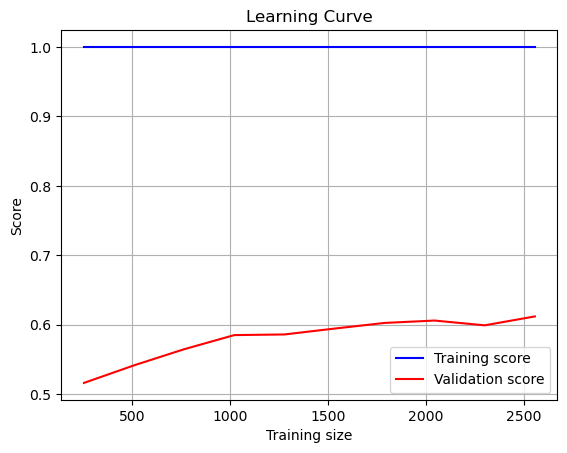

In [118]:
from sklearn.model_selection import learning_curve
train_size, train_score, val_score = learning_curve(
    RandomForestClassifier(),
    Xtrain, ytrain,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=1
)

plt.plot(train_size, np.mean(train_score, 1), color='blue', label="Training score")
plt.plot(train_size, np.mean(val_score, 1), color='red', label="Validation score")
plt.title('Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

### Hyperparamter Tuning

Using Grid Search to find optimal parameters for random forest classifier model

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 75, 85, 100, 125, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)
print("Best parameters found: ", grid_search.best_params_)


/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 6

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'best'}


/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/johnwesley/miniconda3/envs/my-env/lib/python3.12/site-packages/sklearn/base.py", line 666

### Re-train model with hyperparamters

In [126]:
from sklearn.tree import DecisionTreeClassifier         # 1. choose model class
model = DecisionTreeClassifier(criterion='log_loss', max_depth=10, max_features='log2', splitter='best')                        # 2. instantiate model
model.fit(Xtrain, ytrain)                               # 3. fit model to data
ypred = model.predict(Xtest)                            # 4. predict on new data

from sklearn.ensemble import RandomForestClassifier     # 1. choose model class
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt')     # 2. instantiate model
model_rf.fit(Xtrain, ytrain)                            # 3. fit model to data
ypred_rf = model_rf.predict(Xtest)                      # 4. predict on new data

### Re-evaluate the model accuracy

In [127]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, ypred))
print(accuracy_score(ytest, ypred_rf))

0.472992700729927
0.591970802919708


### Implementing HOG on Predicting Animal Species

In [124]:
import os
import numpy as np
from skimage import color, feature, io, transform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [136]:
# Getting species names from folder names
dataset_path = 'CSV//animals-10//few'
classes = os.listdir(dataset_path)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
print(f'Classes: {classes}')

Classes: ['cat', 'butterfly', 'spider', 'elephant']


In [138]:
# Read Images and Labels into lists

images = []
labels = []

valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Check if the file has a valid image extension
        if any(img_path.lower().endswith(ext) for ext in valid_image_extensions):
            img = imread(img_path)  # reads the image file into a NumPy array using skimage
        
        if img.ndim == 2:  # Grayscale image
            img_resized = transform.resize(img, (128, 64))  # Resize image
        elif img.shape[-1] == 4:  # Image has 4 channels (RGBA)
            img = img[:, :, :3]  # Remove the alpha channel
            img_resized = transform.resize(img, (128, 64))  # Resize image
            img_resized = color.rgb2gray(img_resized)  # Convert to grayscale
        elif img.shape[-1] == 3:  # Image has 3 channels (RGB)
            img_resized = transform.resize(img, (128, 64))  # Resize image
            img_resized = color.rgb2gray(img_resized)  # Convert to grayscale
        else:
            continue  # Skip images that do not meet the above criteria
        
        images.append(img_resized)
        labels.append(class_name)

In [139]:
# convert lists to NumPy Arrays
X = np.array(images)                # features matrix
y = np.array(labels)                # target vector

In [140]:
# Extract HOG features from each image
hog_features = []
for image in X:
    features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(features)

# Convert HOG features and labels to numpy arrays
X_hog = np.array(hog_features)

In [141]:
# Convert HOG features and labels to numpy arrays
X_hog = np.array(hog_features)
y_encoded = LabelEncoder().fit_transform(y)


In [142]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hog, y_encoded, test_size=0.3, random_state=42)

Accuracy: 0.5572574762946754
              precision    recall  f1-score   support

         cat       0.54      0.34      0.42       334
   butterfly       0.56      0.20      0.30       269
      spider       0.79      0.51      0.62       203
    elephant       0.53      0.87      0.66       565

    accuracy                           0.56      1371
   macro avg       0.60      0.48      0.50      1371
weighted avg       0.58      0.56      0.52      1371



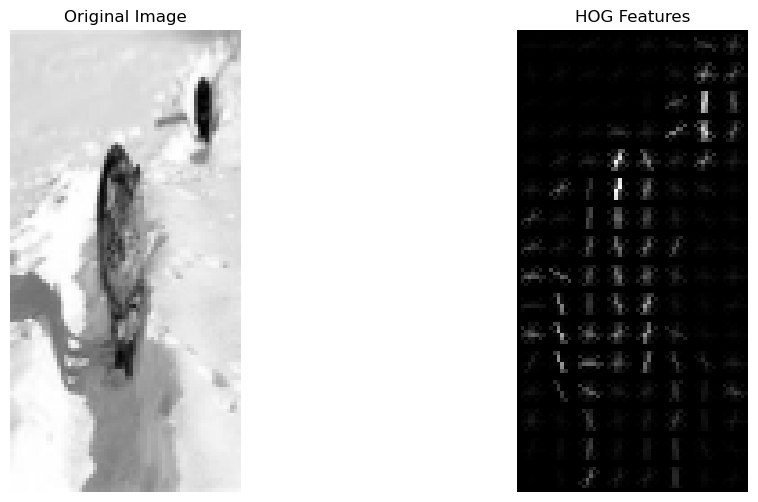

In [144]:
 # Train RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=classes))

# Plot an example of HOG features for visualization
image = X[0]
hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)[1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()


### Unsupervised Example using Animal Species Prediction

In [148]:
# Getting species names from folder names
dataset_path = 'CSV//animals-10//few'
classes = os.listdir(dataset_path)
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
print(f'Classes: {classes}')

# Read Images and Labels into lists
images = []
labels = []

valid_image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        # Check if the file has a valid image extension
        if any(img_path.lower().endswith(ext) for ext in valid_image_extensions):
            img = imread(img_path)  # reads the image file into a NumPy array using skimage
        
        if img.ndim == 2:  # Grayscale image
            img_resized = transform.resize(img, (128, 64))  # Resize image
        elif img.shape[-1] == 4:  # Image has 4 channels (RGBA)
            img = img[:, :, :3]  # Remove the alpha channel
            img_resized = transform.resize(img, (128, 64))  # Resize image
            img_resized = color.rgb2gray(img_resized)  # Convert to grayscale
        elif img.shape[-1] == 3:  # Image has 3 channels (RGB)
            img_resized = transform.resize(img, (128, 64))  # Resize image
            img_resized = color.rgb2gray(img_resized)  # Convert to grayscale
        else:
            continue  # Skip images that do not meet the above criteria
        
        images.append(img_resized)
        labels.append(class_name)
# convert lists to NumPy Arrays
X = np.array(images)                # features matrix
y = np.array(labels)                # target vector


Classes: ['cat', 'butterfly', 'spider', 'elephant']


In [152]:
# Extract HOG features from each image
hog_features = []
for image in X:
    features = feature.hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(features)

# Convert HOG features and labels to numpy arrays
X_hog = np.array(hog_features)

In [153]:
# using a clustering algorithm
from sklearn.cluster import KMeans                          # 1. choose the model class
num_clusters = 4
model_k = KMeans(n_clusters=num_clusters, random_state=42)   # 2. instantiate the model with hyperparamters
model_k.fit(X_hog)                        # 3. Fit to data. No target vector is specified
y_clusters = model_k.predict(X_hog)
print(y_clusters)

[2 2 2 ... 2 2 1]


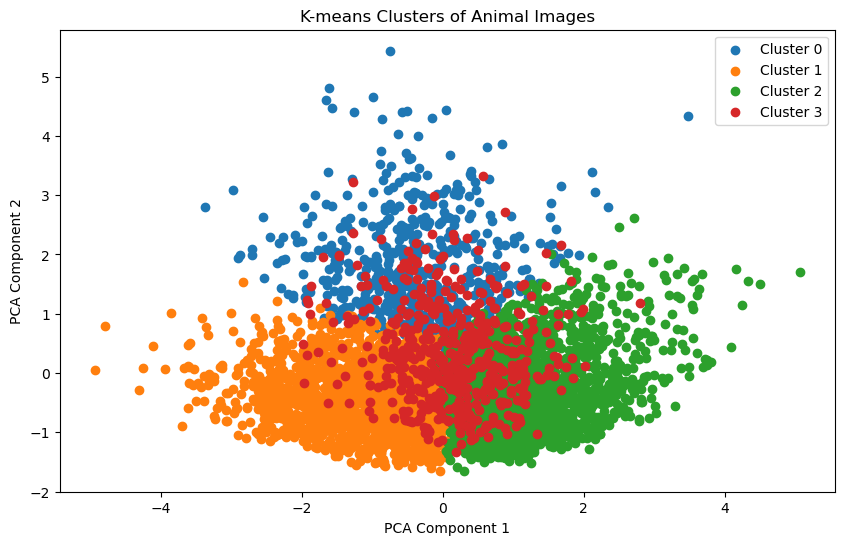

In [154]:
# Linear dimensionality reduction
from sklearn.decomposition import PCA                      # 1. choose the model class
model_pca = PCA(n_components=2)                            # 2. instantiate the model with hyperparamters
model_pca.fit(X_hog)                                       # 3. Fit to data. No target vector specified
X_2D = model_pca.transform(X_hog)                         # 4. Transform the data to two dimensions

plt.figure(figsize=(10,6))
for i in range(num_clusters):
    cluster_points = X_2D[y_clusters == i]
    plt.scatter(cluster_points[:,0], cluster_points[:, 1], label=f'Cluster {i}')
plt.title('K-means Clusters of Animal Images')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend();